In [3]:
# %load 7.8.1 用SVM对玄武岩进行分类.py

# 代码 7-1

import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
basalt = pd.read_csv('../data/basalt.csv')
## 将数据和标签拆开
basalt_data = basalt.iloc[:,5:]
basalt_target = basalt.iloc[:,0]

## 划分训练集，测试集
basalt_train,basalt_test,basalt_target_train,basalt_target_test = \
train_test_split(basalt_data,basalt_target,train_size = 0.8,random_state = 42)

## 标准化
stdScaler = StandardScaler().fit(basalt_train)
basalt_std_train = stdScaler.transform(basalt_train)
basalt_std_test = stdScaler.transform(basalt_test)

print('数据的前4行为：\n',basalt_data.head())
print('目标标签的前4行为：\n',basalt_target.head())

## 建模
svm_basalt = SVC().fit(basalt_std_train,basalt_target_train)
print('建立的SVM模型为：','\n',svm_basalt)

basalt_target_pred = svm_basalt.predict(basalt_std_test)
print('basalt数据集的SVM分类报告为：\n',
      classification_report(basalt_target_test,basalt_target_pred))

数据的前4行为：
    SIO2(WT%)  TIO2(WT%)  AL2O3(WT%)  Fe2O3T(WT%)  CAO(WT%)  MGO(WT%)  \
0      48.42       1.69       15.41        10.19      8.37     10.32   
1      48.21       1.91       15.58        10.36      8.44      9.28   
2      48.23       1.92       15.58        10.09      8.57      9.15   
3      51.13       2.40       14.37        12.06      7.89      4.42   
4      51.40       1.05       17.31         8.95      8.66      6.83   

   MNO(WT%)  K2O(WT%)  NA2O(WT%)  P2O5(WT%)  ...  GD(PPM)  TB(PPM)  DY(PPM)  \
0      0.17      1.54       3.19       0.34  ...     4.69    0.739     4.27   
1      0.17      1.68       3.09       0.38  ...     5.10    0.801     4.60   
2      0.16      1.86       2.99       0.39  ...     5.29    0.824     4.76   
3      0.25      0.85       3.60       1.17  ...     9.25    1.270     6.88   
4      0.17      0.88       3.17       0.34  ...     4.92    0.630     3.84   

   HO(PPM)  ER(PPM)  TM(PPM)  YB(PPM)  LU(PPM)  HF(PPM)  TA(PPM)  
0    0.832     

E:\Geo_Data\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Geo_Data\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Geo_Data\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# %load 7.8.2 决策树.py

# 代码 7-2

import pydotplus
import pandas as pd
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier as DTC
import numpy as np
#参数初始化
data = pd.read_excel('../data/susceptibility.xls', index_col = u'index') #导入数据
#数据是类别变量，要将它转换为1、-1数值变量
#用1来表示“strong”、“rich”、“likely”这三个属性，用-1来表示“weak”、“poor”、“unlikely”
print('数据变化前:\n',data.head())
data[data == 'strong'] = 1
data[data == 'rich'] = 1
data[data == 'likely'] = 1
data[data != 1] = -1
print('数据变化后:\n',data.head())
x = data.iloc[:,:3].astype(int)
y = data.iloc[:,3].astype(int)

dtc = DTC(criterion='entropy') #建立决策树模型，基于信息熵
dtc.fit(x, y) #训练模型
#导入相关函数，可视化决策树。
#导出的结果是一个dot文件，需要安装Graphviz才能将它转换为pdf或png等格式。
data_feature_name = data.columns[:3]
data_target_name = ['likely','unlikely']
f = export_graphviz(dtc,out_file=None, feature_names=data_feature_name,
                    class_names=data_target_name,  filled=True, rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(f)

# 保存图像到pdf文件
# 需要在http://www.graphviz.org/下载相应Graphviz版本
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
graph.write_pdf("./tmp/susceptibility.pdf")

ModuleNotFoundError: No module named 'pydotplus'

转化为布尔值前数据的前4行为：
        TECTONIC SETTING  SIO2(WT%)  TIO2(WT%)  AL2O3(WT%)  Fe2O3T(WT%)  \
0  INTRAPLATE VOLCANICS      48.42       1.69       15.41        10.19   
1  INTRAPLATE VOLCANICS      48.21       1.91       15.58        10.36   
2  INTRAPLATE VOLCANICS      48.23       1.92       15.58        10.09   
3     CONVERGENT MARGIN      51.13       2.40       14.37        12.06   
4     CONVERGENT MARGIN      51.40       1.05       17.31         8.95   

   CAO(WT%)  MGO(WT%)  MNO(WT%)  K2O(WT%)  NA2O(WT%)  P2O5(WT%)  
0      8.37     10.32      0.17      1.54       3.19       0.34  
1      8.44      9.28      0.17      1.68       3.09       0.38  
2      8.57      9.15      0.16      1.86       2.99       0.39  
3      7.89      4.42      0.25      0.85       3.60       1.17  
4      8.66      6.83      0.17      0.88       3.17       0.34  
转化为布尔值后数据的前4行为：
   TECTONIC SETTING  SIO2(WT%)  TIO2(WT%)  AL2O3(WT%)  Fe2O3T(WT%)  CAO(WT%)  \
0                1      48.42       1.69      

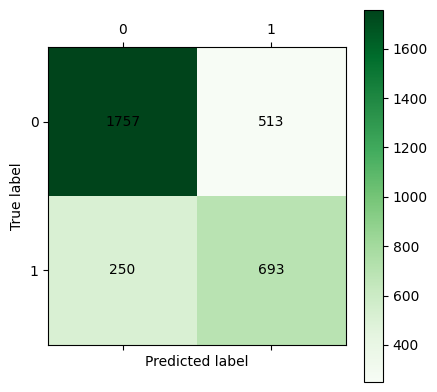

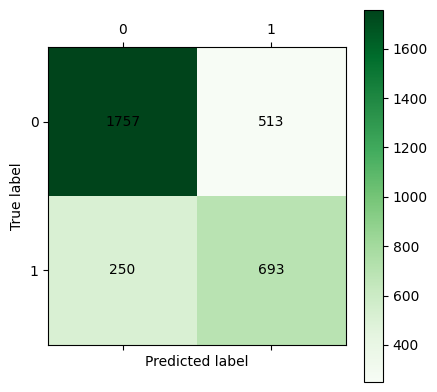

In [4]:
# %load 7.8.3 利用人工神经网络对玄武岩进行分类.py

# 代码 7-3

import pandas as pd
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers.core import Dense, Activation
#参数初始化
basalt = pd.read_csv('../data/basalt.csv')  
# 浏览数据集  
data = basalt.drop(basalt.columns[1:5],axis=1)
data = data.iloc[:,0:11]
print('转化为布尔值前数据的前4行为：\n',data.head())
data.loc[data['TECTONIC SETTING']=='INTRAPLATE VOLCANICS','TECTONIC SETTING'] = 1
data.loc[data['TECTONIC SETTING']!= 1,'TECTONIC SETTING'] = 0
print('转化为布尔值后数据的前4行为：\n',data.head())
df1 = data.iloc[:,1:11]
def MinMaxScale(data):
    data=(data-data.min())/(data.max()-data.min())
    return data
df2 = MinMaxScale(df1)
x = df2.values
y = data.iloc[:,0].values

model = Sequential() #建立模型
model.add(Dense(units=10, input_dim=10))  # Specify the number of units and input_dim
model.add(Activation('relu')) #用relu函数作为激活函数，能够大幅提供准确度
model.add(Dense(units=1))  # Specify the number of units
model.add(Activation('sigmoid')) #由于是0-1输出，用sigmoid函数作为激活函数

#另外常见的损失函数还有mean_squared_error、categorical_crossentropy等，请阅读帮助文件。
#求解方法我们指定用adam，还有sgd、rmsprop等可选
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
y = y.astype(float)  # Convert 'y' to float
model.fit(x, y, epochs=200, batch_size=10)


y = y.astype(float)  # Convert 'y' to float
model.fit(x, y, epochs=200, batch_size=10)

#自定义混淆矩阵可视化函数
def cm_plot(y, yp):  
  from sklearn.metrics import confusion_matrix #导入混淆矩阵函数  
  cm = confusion_matrix(y, yp) #混淆矩阵   
  plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。  
  plt.colorbar() #颜色标签  
  for x in range(len(cm)): #数据标签  
    for y in range(len(cm)):  
      plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')  
  plt.ylabel('True label') #坐标轴标签  
  plt.xlabel('Predicted label') #坐标轴标签  
  return plt 

# Predict probabilities
y_probabilities = model.predict(x)

# Threshold probabilities to get predicted classes
yp = (y_probabilities > 0.5).astype(int).reshape(len(y))

# Call the cm_plot function
cm_plot(y, yp).show()  #显示混淆矩阵可视化结果
cm_plot(y, yp).savefig('../tmp/混淆矩阵.png')



这个程序的主要步骤包括：

导入所需的库，包括Pandas用于数据处理、Matplotlib用于可视化、Keras用于构建和训练神经网络。

从CSV文件中读取数据，然后进行数据预处理，包括删除不需要的列和将某一列的特定值转化为布尔值。

提取特征列并对它们进行归一化处理。

创建一个包含输入层、隐藏层和输出层的Sequential模型。

编译模型，指定损失函数和优化器。

训练模型，使用标签数据训练神经网络模型。

导入混淆矩阵函数，并定义混淆矩阵可视化函数。

使用模型预测数据的类别概率，并将概率转化为二分类预测。

调用混淆矩阵可视化函数，绘制混淆矩阵图并显示或保存图像。

转化为布尔值前数据的前4行为：
        TECTONIC SETTING  SIO2(WT%)  TIO2(WT%)  AL2O3(WT%)  Fe2O3T(WT%)  \
0  INTRAPLATE VOLCANICS      48.42       1.69       15.41        10.19   
1  INTRAPLATE VOLCANICS      48.21       1.91       15.58        10.36   
2  INTRAPLATE VOLCANICS      48.23       1.92       15.58        10.09   
3     CONVERGENT MARGIN      51.13       2.40       14.37        12.06   
4     CONVERGENT MARGIN      51.40       1.05       17.31         8.95   

   CAO(WT%)  MGO(WT%)  MNO(WT%)  K2O(WT%)  NA2O(WT%)  P2O5(WT%)  
0      8.37     10.32      0.17      1.54       3.19       0.34  
1      8.44      9.28      0.17      1.68       3.09       0.38  
2      8.57      9.15      0.16      1.86       2.99       0.39  
3      7.89      4.42      0.25      0.85       3.60       1.17  
4      8.66      6.83      0.17      0.88       3.17       0.34  
转化为布尔值后数据的前4行为：
   TECTONIC SETTING  SIO2(WT%)  TIO2(WT%)  AL2O3(WT%)  Fe2O3T(WT%)  CAO(WT%)  \
0                1      48.42       1.69      

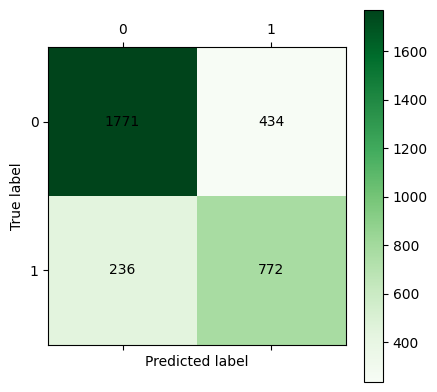

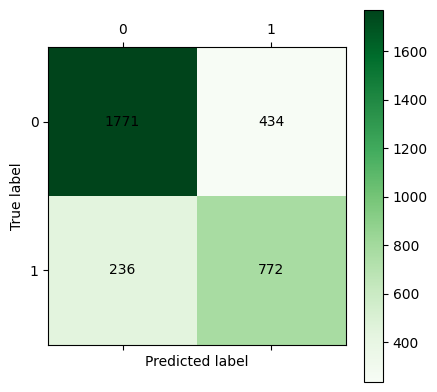

In [5]:
# 导入所需的库
import pandas as pd
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# 从CSV文件中读取数据到DataFrame
basalt = pd.read_csv('../data/basalt.csv')

# 数据预处理：删除不需要的列
data = basalt.drop(basalt.columns[1:5], axis=1)
data = data.iloc[:, 0:11]

# 显示数据的前4行
print('转化为布尔值前数据的前4行为：\n', data.head())

# 将某一列的特定值转化为布尔值（0或1）
data.loc[data['TECTONIC SETTING'] == 'INTRAPLATE VOLCANICS', 'TECTONIC SETTING'] = 1
data.loc[data['TECTONIC SETTING'] != 1, 'TECTONIC SETTING'] = 0

# 显示数据的前4行，此时某列已转化为布尔值
print('转化为布尔值后数据的前4行为：\n', data.head())

# 提取特征列
df1 = data.iloc[:, 1:11]

# 定义归一化函数
def MinMaxScale(data):
    data = (data - data.min()) / (data.max() - data.min())
    return data

# 对特征进行归一化
df2 = MinMaxScale(df1)

# 将DataFrame转化为NumPy数组
x = df2.values
y = data.iloc[:, 0].values

# 创建一个Sequential模型
model = Sequential()

# 添加输入层和隐藏层，使用ReLU激活函数
model.add(Dense(units=10, input_dim=10))
model.add(Activation('relu'))

# 添加输出层，使用Sigmoid激活函数，用于二分类问题
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

# 编译模型，指定损失函数和优化器
model.compile(loss='binary_crossentropy', optimizer='adam')

# 将标签数据转化为浮点数类型
y = y.astype(float)

# 训练模型，指定训练轮数和批次大小
model.fit(x, y, epochs=200, batch_size=10)

# 导入混淆矩阵函数
from sklearn.metrics import confusion_matrix

# 定义混淆矩阵可视化函数
def cm_plot(y, yp):
    cm = confusion_matrix(y, yp)  # 计算混淆矩阵
    plt.matshow(cm, cmap=plt.cm.Greens)  # 绘制混淆矩阵图
    plt.colorbar()  # 颜色标签
    for x in range(len(cm)):  # 数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label')  # 坐标轴标签
    plt.xlabel('Predicted label')  # 坐标轴标签
    return plt

# 使用模型预测数据的类别概率
y_probabilities = model.predict(x)

# 根据阈值将概率转化为预测的类别（0或1）
yp = (y_probabilities > 0.5).astype(int).reshape(len(y))

# 调用cm_plot函数绘制混淆矩阵可视化结果并显示或保存图像
cm_plot(y, yp).show()  # 显示混淆矩阵可视化结果
cm_plot(y, yp).savefig('../tmp/混淆矩阵.png')  # 保存混淆矩阵图像
